# Predicting Breast Cancer

Traditionally, breast cancer has been diagnosed using invasive surgical procedures. However, techniques, such as image processing of just a single drop of specimen (fluid taken from the breast tumor) paired with machine learning, has dramatically decreased the need for full biopsies.
This project will demonstrate the aforementioned technique by processing measurements of 569 photos. Each photo contains features of tumor cell nuclei such as shape, texture and size.

The data can be found on the UCI Irvine Machine Learning Respository website: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
#importing libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_auc_score, average_precision_score, classification_report, confusion_matrix)
df = pd.read_csv('data.csv')
np.random.seed(42)

In [2]:
#viewing the data
df.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


The data contains 10 basic features measured in three ways (total of 30 columns): mean, standard error, and worst-case measurement (largest mean measured). It includes two classifications: benign and malignant.

Feature Descriptions
   1. radius -  distance from the center to points on the perimeter
   2. texture - deviation of gray-scale values
   3. perimeter - perimeter of the cell nucleus
   4. area - area of the cell nucleus
   5. smoothness - local variation in radius length
   6. compactness - perimeter^2 / area-1.0
   7. concavity - severity of concave portions of the contour
   8. concave points - number of concave portions of the contour
   9. symmetry - symmetry of the cell nucleus
   10. fractal dimension - coastline approximation - 1

In [3]:
#viewing basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
#finding duplicates
df.duplicated().sum() 

0

In [5]:
#checking for nulls
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#deleting unncessary column
df.drop(['Unnamed: 32', 'id'],axis=1, inplace=True)

In [7]:
#viewing data types 
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
#listing all of the columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
#viewing class values 
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

The dataset is imbalanced.

In [10]:
#identifying basic features
basic_features = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

We will use these features in our analysis. 

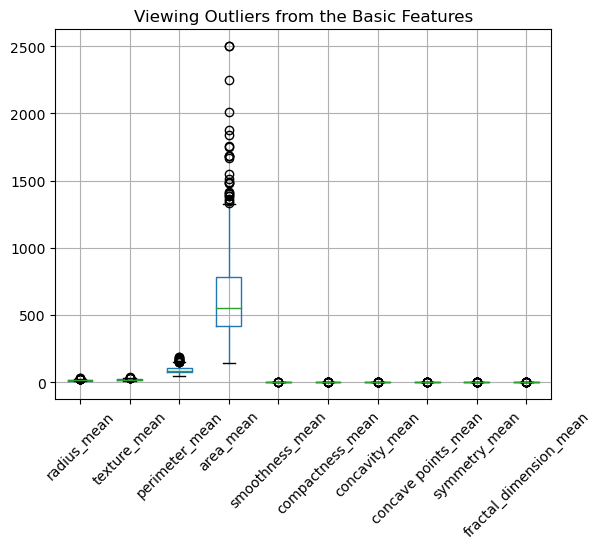

In [11]:
#viewing outliers
basic_features.boxplot()
plt.xticks(rotation=45)
plt.title('Viewing Outliers from the Basic Features')
plt.show()

perimeter_mean has many outliers. Let's compare the distribution per diagnosis. 

In [12]:
#converting categorical values
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

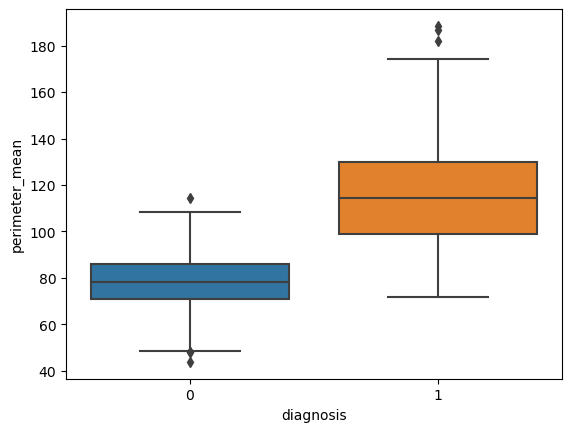

In [13]:
#perimeter_mean per diagnosis
sns.boxplot(data=df, y='perimeter_mean', x='diagnosis')
plt.show()

Given the significant distribution difference observed between diagnoses, let's examine the remaining features in a similar manner.

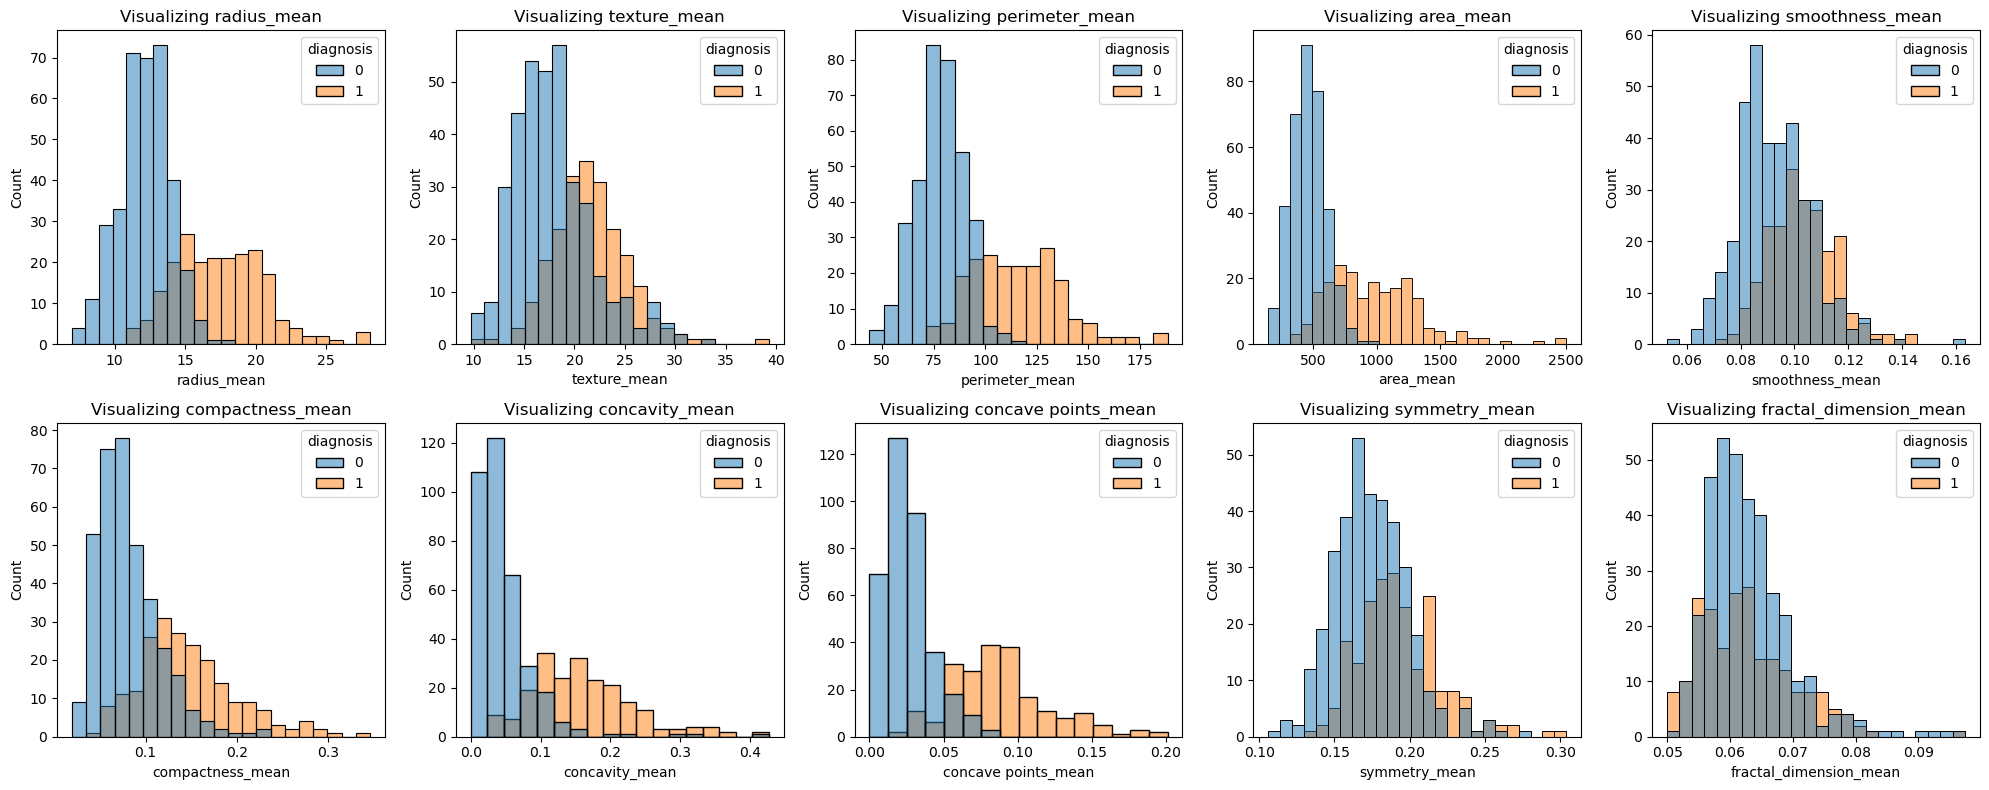

In [14]:
#viewing distributions per diagnosis
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
plot_index = 0
for col in df:
    if col in basic_features:
        sns.histplot(x=df[col], hue=df['diagnosis'], ax=axs[plot_index], color=['blue', 'purple'])
        axs[plot_index].set_title(f"Visualizing {col}")
        plot_index += 1
plt.tight_layout()
plt.show()

The distribution of features varies depending on the diagnosis.

In [15]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']]

In [16]:
# undersampling the major class
df_for_sampling = df.sample(frac=1)

cancer_df = df_for_sampling.loc[df_for_sampling['diagnosis'] == 1]
not_cancer_df = df_for_sampling.loc[df_for_sampling['diagnosis'] == 0][:212]
normal_distributed_df = pd.concat([cancer_df, not_cancer_df])

undersampled_df = normal_distributed_df.sample(frac=1, random_state=42)

undersampled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,1
486,14.640,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0
64,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,1
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,0
377,13.460,28.21,85.89,562.1,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0
...,...,...,...,...,...,...,...,...,...,...,...
42,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,1
444,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,1
500,15.040,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,0
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,0


The purpose of undersampling the class with the most samples is to ensure our models accuracy is a true representation of our models performance. If we do not make our dataset balanced, we will not be able to trust our models' evaluation metrics. 

In [17]:
undersampled_df['diagnosis'].value_counts()

diagnosis
1    212
0    212
Name: count, dtype: int64

The data is now balanced. 

In [18]:
#convert to a dataframe
undersampled_new_df = pd.DataFrame(undersampled_df, columns=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis'])

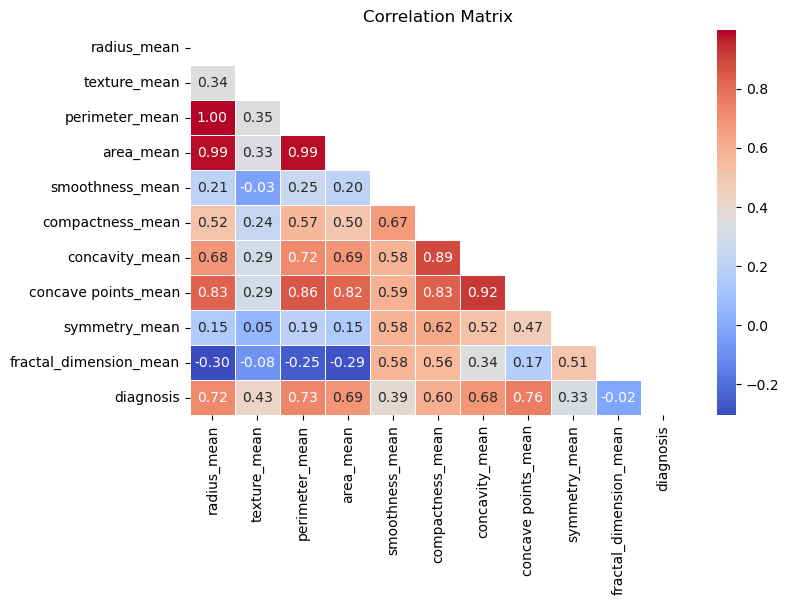

In [19]:
#viewing correlations
corr = undersampled_new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Multicolinearity is present. If not addressed, our machine learning model can have a number of problems including overfitting, underfitting, and reduced interpretability.*

The heatmap shows that the data contains 3 columns with high correlation. To avoid dropping too many columns and therefore losing valuable data, let's drop two columns with the highest correlations. 

*This excludes tree-based models which are robust to issues in multicollinearity in regards to prediction evaluation metrics. 

In [20]:
to_drop=['perimeter_mean', 'area_mean']
undersampled_new_df = undersampled_new_df.drop(to_drop, axis = 1)

In [21]:
undersampled_new_df

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
35,16.740,21.59,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,1
486,14.640,16.85,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0
64,12.680,23.84,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590,1
348,11.470,16.03,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,0
377,13.460,28.21,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763,0
...,...,...,...,...,...,...,...,...,...
42,19.070,24.81,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343,1
444,18.030,16.85,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,1
500,15.040,16.74,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,0
553,9.333,21.94,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,0


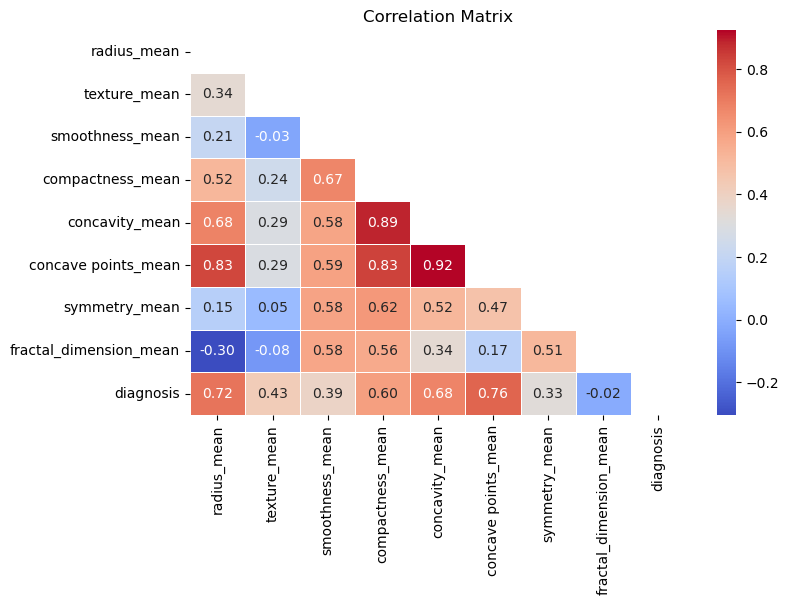

In [22]:
#viewing correlations after dropping two columns with high multicollinearity 
corr = undersampled_new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The heatmap looks much better. 

In [23]:
#separating features from classes
X = undersampled_new_df.drop('diagnosis', axis=1)
y = undersampled_new_df['diagnosis']
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
35,16.740,21.59,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656
486,14.640,16.85,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355
64,12.680,23.84,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590
348,11.470,16.03,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372
377,13.460,28.21,0.07517,0.04726,0.01271,0.01117,0.1421,0.05763
...,...,...,...,...,...,...,...,...
42,19.070,24.81,0.09081,0.21900,0.21070,0.09961,0.2310,0.06343
444,18.030,16.85,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780
500,15.040,16.74,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869
553,9.333,21.94,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576


In [24]:
#scaling
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [25]:
print(X_scaled.shape)
print(y.shape)

(424, 8)
(424,)


In [26]:
#splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 8)
(106, 8)
(318,)
(106,)


#### Classifiers we will be using:

1. Decision Tree Classifier
2. Random Forest Classifier
3. KNeighborsClassifier
4. Logistic Regression
5. SVC

##### Decision tree Classifier

In [28]:
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
print(model_tree.score(X_test, y_test))
print(model_tree.score(X_train, y_train))

0.9150943396226415
1.0


The model is overfit. Let's try to reduce overfitting by adjusting the models' parameters with GridSearchCV. 

In [29]:
#GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_para, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [30]:
#inputing best parameters
model_tree2 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth= 4)
model_tree2.fit(X_train, y_train)
print(model_tree2.score(X_test, y_test))
print(model_tree2.score(X_train, y_train))

0.9245283018867925
0.9685534591194969


The model is now less overfit. 

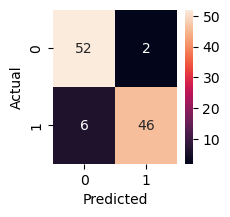

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.96      0.88      0.92        52

    accuracy                           0.92       106
   macro avg       0.93      0.92      0.92       106
weighted avg       0.93      0.92      0.92       106

ROC-AUC: 0.9237891737891738


In [31]:
#evaluating the model
y_pred = model_tree2.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: {0}".format(roc_auc))

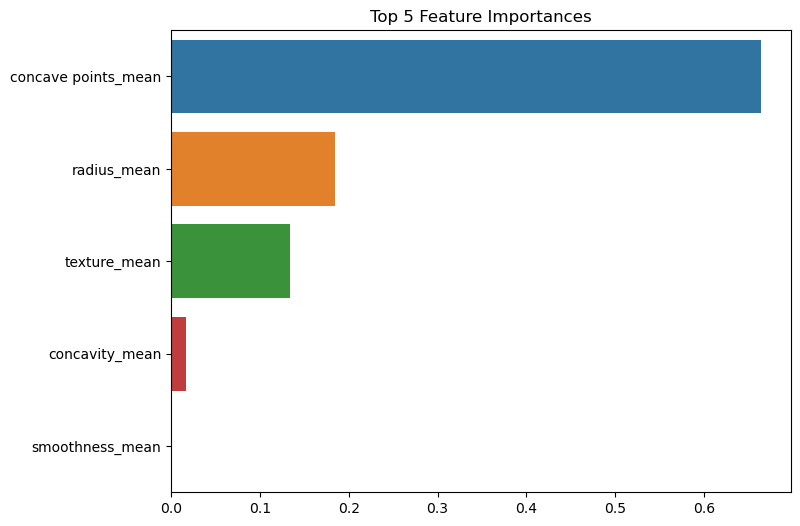

In [32]:
#finding the most important features
ftr_importances_values = model_tree2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Top 5 Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()

Looking at feature importances is a great way to see the impact of each feature on machine learning models. The higher the score of the feature indicates the larger effect it has on the model to predict a certain variable. 

###### Random Forest Classifier

In [33]:
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)
print(model_forest.score(X_test, y_test))
print(model_forest.score(X_train, y_train))

0.9245283018867925
1.0


The model is overfit. 

In [34]:
#GridSearchCV
param_grid = { 
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'max_depth' : [4,5,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)   
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [35]:
#inputting the best params
model_forest2 = RandomForestClassifier(random_state=42, criterion='gini', max_depth=5, max_features='sqrt', n_estimators=200)
model_forest2.fit(X_train, y_train)
print(model_forest2.score(X_test, y_test))
print(model_forest2.score(X_train, y_train))

0.9245283018867925
0.9905660377358491


The model is now less overfit. 

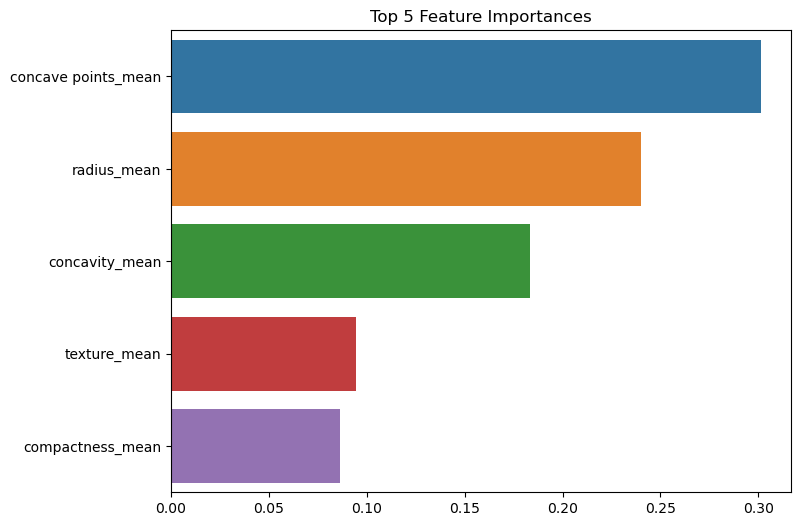

In [36]:
#finding the most important features
ftr_importances_values = model_forest2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Top 5 Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()

##### K Neighbors Classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

0.9056603773584906
0.949685534591195


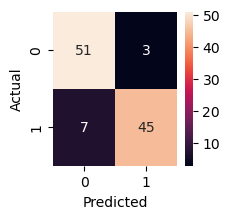

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        54
           1       0.94      0.87      0.90        52

    accuracy                           0.91       106
   macro avg       0.91      0.90      0.91       106
weighted avg       0.91      0.91      0.91       106

ROC-AUC: 0.9049145299145299


In [38]:
#evaluating the model
y_pred = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: {0}".format(roc_auc))

##### Logistic Regression

In [39]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
print(model_lr.score(X_test, y_test))
print(model_lr.score(X_train, y_train))

0.9056603773584906
0.9528301886792453


In [40]:
parameters = {'C':[1, 10, 100, 1000]}
grid_searchlr = GridSearchCV(estimator = LogisticRegression(random_state=42), param_grid = parameters, scoring = 'accuracy', 
                            cv = 5, verbose=0)
grid_searchlr.fit(X_train, y_train)   
print(grid_searchlr.best_params_)

{'C': 1}


C=1 is the default -- we don't need to make a new model with the best parameters. 

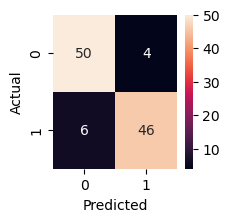

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.92      0.88      0.90        52

    accuracy                           0.91       106
   macro avg       0.91      0.91      0.91       106
weighted avg       0.91      0.91      0.91       106

ROC-AUC: 0.9052706552706552


In [41]:
#evaluating the model
y_pred = model_lr.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: {0}".format(roc_auc))

##### SVC

In [42]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
print(model_svc.score(X_test, y_test))
print(model_svc.score(X_train, y_train))

0.9150943396226415
0.9685534591194969


In [43]:
param_gridSVC = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
grid_searchSVC= GridSearchCV(estimator=SVC(random_state=42), 
                            param_grid=param_gridSVC, scoring='accuracy', cv=5, verbose=3)
grid_searchSVC.fit(X_train, y_train)   
print(grid_searchSVC.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.984 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [44]:
#SVC with the best params
model_svc2 = SVC(C=100, gamma=0.01, kernel='rbf', random_state=42)
model_svc2.fit(X_train, y_train)
print(model_svc2.score(X_test, y_test))
print(model_svc2.score(X_train, y_train))

0.9150943396226415
0.9685534591194969


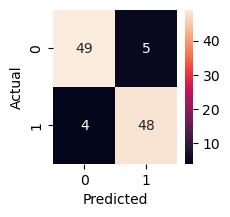

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.91      0.92      0.91        52

    accuracy                           0.92       106
   macro avg       0.92      0.92      0.92       106
weighted avg       0.92      0.92      0.92       106

ROC-AUC: 0.9152421652421653


In [45]:
#evaluating the model
y_pred = model_svc2.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_test,y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC: {0}".format(roc_auc))

### Summary

The model is most influenced by the following features: concave_points_mean, radius_mean, and texture_mean.
Our best score was from the Decision Tree Classifier with 92% accuracy. More importantly, the Decision Tree Classifier had a precision score of 96% for the malignant (1) class. This metric is very important because, in the case of breast cancer, detection of breast cancer is more important than detection of no breast cancer (subjective). 

### What's Next?

If I had to keep improving the accuracy score, I could do a number of things:
 1. Use other algorithms
 2. Perform exhaustive hyperparameter tuning
 3. Use ensembles (bagging and boosting)
 4. Use neural networks 
 5. Collect more data (this can be done artifically using SMOTE - minority ovesampling technique, or random resampling, feature engineering, PCA)

### Ending Thoughts
Machine learning is a fun and powerful tool we can use to solve real-world problems-- like detecting breast cancer! This was my first python project I completed end-to-end and I enjoyed the entire process. I learned many things, one of which, is that understanding how the models work is crucial for the entire prediction process. Each model can be affected in different ways depending not only on the data you feed to the model but how you tune and interpret the model as well. 

I learned most things from reading the books listed on my Github (all data science related) and seeing random peoples posts on Kaggle. Because of this, I learned that there is no perfect method for performing machine learning and there is no end to improvement. 

If you read through this notebook I would appreciate tips or feedback on how to improve this project. 
Thank you. 

### Sources

* Understanding Feature Importance: https://builtin.com/data-science/feature-importance
* Multicollinearity in Machine Learning: https://www.linkedin.com/pulse/multicollinearity-machine-learning-rachit-singh/
* Machine Learning in Medicine: https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-019-0681-4